# Self Driving Car Engineer Project 5 - Vehicle Detection and Tracking

**Benjamin Söllner, Jul 2017**

---

<img src="project_carnd_5_vehicle_detection_400.png" alt="Fun Project Header Image" style="margin: 0;"/>

---

<br />
<div id="toc"></div>

In [1]:
%%javascript
/* JavaScript plugin that generates a Table of Contents */
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

# Model, Hyperparameters & Artifacts

In [2]:
from src.model import *
from src.tests import *
from src.hyperparams import *
from IPython.display import HTML
HTML_VIDEO_SNIPPET = """
<video width="960" height="540" controls>
  <source src="{0}">
</video>
"""
%matplotlib inline

This loads all the model functions and hyperparameters (from the file ``src/hyperparams.py``) which look like:

```python
HYPERPARAMS = {
    'COLOR_SPACE': 'YUV', # Color space
    'SPATIAL_FEAT': False, # Using spacial features?
    'SPATIAL_SIZE': (32, 32), # How many spacial features
    'HOG_FEAT': True, # Using hog features?
    'HOG_ORIENT': 11, # Number of possible hog cell orientations
    'HOG_PIX_PER_CELL': 8, # Pixels per hog cell
    'HOG_CELL_PER_BLOCK': 2, # Hog cell overlap
    'HOG_CHANNEL': 'ALL', # Which hog channels to use
    'HOG_SQRT': False, # use hog's sqrt_transform=True parameter?
    'HIST_FEAT': True, # Using histogram features?
    'HIST_RANGE': (0.0, 1.0), # Histogram min / max
    'HIST_BIN': 32, # How many bins for histogram
    'Y_START': 350, # Top pixel
    'Y_STOP': 656, # Bottom pixel
    'RESCALES': [1.0], # Scales of windows based on 64x64 window being scale 1.0
    'HEAT_THRESHOLD': 5.0, # Threshold to reject false positives
    'HEAT_FRAMES': 40 # Over how many frames to collect heat
}

```

In [3]:
templates_path = 'data/**/**/*.png'
test_image = mpimg.imread('submodules/CarND-Vehicle-Detection/test_images/test1.jpg')/255.
template_list = [
    'data/vehicles/GTI_MiddleClose/image0000.png',
    'data/vehicles/GTI_MiddleClose/image0039.png',
    'data/vehicles/GTI_MiddleClose/image0054.png',
    'data/vehicles/GTI_MiddleClose/image0073.png',
    'data/vehicles/GTI_MiddleClose/image0084.png'
]
template_image = mpimg.imread(template_list[4])
clf_pickle = "pickles/classifier.pkl"
test_video_input = "submodules/CarND-Vehicle-Detection/project_video.mp4"
test_video_output = "project_video_output.mp4"
test_video_output_debug = "project_video_output_debug.mp4"

Here we set a few filename references for the tests later on. Make sure all the submodules from the repository are initialized and data is downloaded using the shell scripts in the ``data`` directory before proceeding.

# Bits & Pieces
## Drawing Bounding Boxes
Draws a bunch of boxes on a test_image and shows the output with matplotlib.

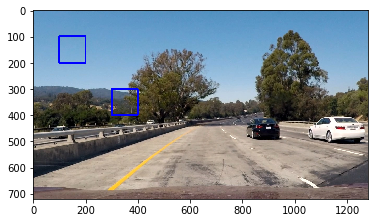

In [4]:
test_draw_boxes(test_image)

## Finding Simple Template Matches (Spatial Matching)
Does spacial pattern matching with a list of template files (template_list) on a test_image, plots the bounding boxes of the matches with matplotlib.

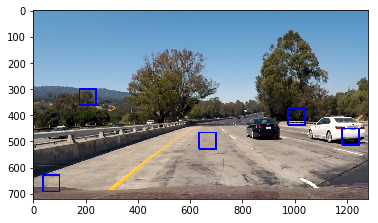

In [5]:
test_find_matches(test_image, template_list)

## Getting Histogram Features of a Template Image
Extracts histogram features from a test_image and plots them with subplots in matplotlib.

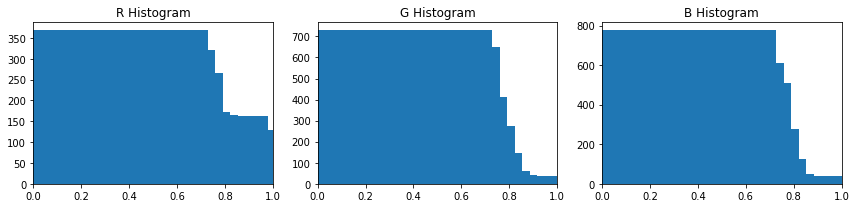

In [6]:
test_get_hist_features(template_image)

## Getting Spatial Feature of a Template Image
Extracts spatial features from a test_image and plots them with subplots in matplotlib.

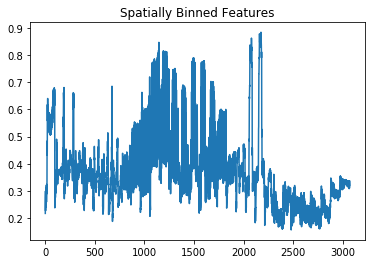

In [7]:
test_get_spatial_features(template_image)

## Getting Hog Features of a Random Template Image
Extracts hog features from a list of templates described by templates_path_pattern and choose one template at random & visualize its result.

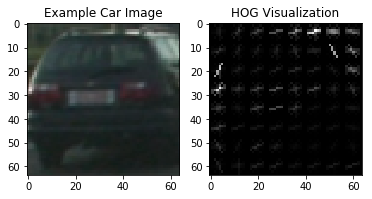

In [8]:
test_get_hog_features(templates_path)

## Get All Features of a Random Template Image
Extracts all features from a list of templates described by templates_path_pattern and choose one template at random & visualize its result.

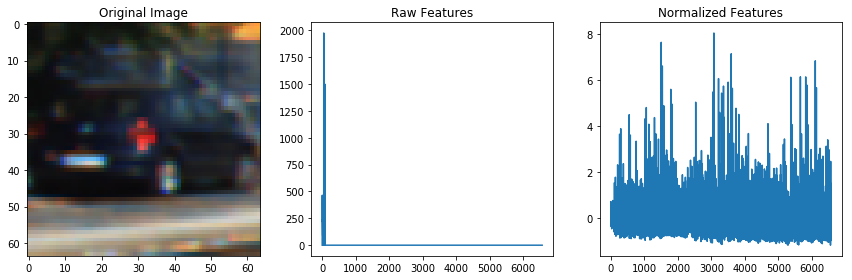

In [9]:
test_get_features_images(templates_path)

## Generate the Classifier
Generate and store the car/notcar classifier based on the car/notcar templates.

In [10]:
test_generate_classifier(templates_path, persist_clf_filename=clf_pickle)

Test Accuracy of SVC =  0.991
My SVC predicts:  [ 0.  1.  1.  1.  1.  0.  1.  0.  1.  0.]
For these 10 labels:  [ 0.  1.  1.  1.  1.  0.  1.  0.  1.  0.]


## Generate Sliding Windows
Generate sliding windows over the image with 128x128 window size and 50% window overlap in x&y, visualize the sliding windows with matplotlib.

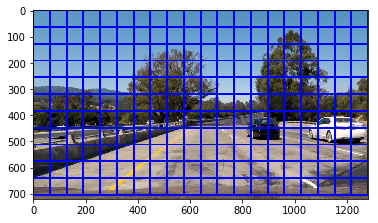

In [11]:
test_slide_window(test_image)

## Search the Sliding Windows for Car-Matches
Search sliding windows of size 96x96 with 50% overlap for images found from the car/notcar classifier

Test Accuracy of SVC =  0.991
Confidences:
[array([ 0.28836625]), array([ 0.47544122])]


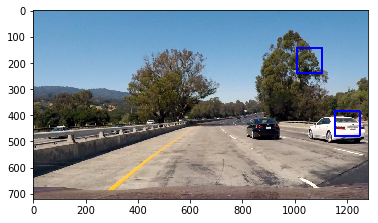

In [12]:
test_search_windows(templates_path, test_image, restore_clf_filename=clf_pickle)

# Putting It All Together
## Search an Image with Sliding Windows of One Size
Search sliding windows of size 64x64 with 50% overlap for images found from the car/notcar classifier. Use performant version of feature extraction with hog features only generated once.

Test Accuracy of SVC =  0.991


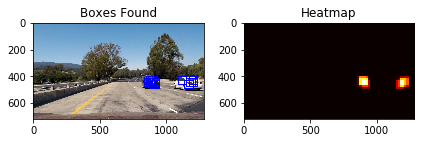

In [13]:
test_scan_single_win_size(templates_path, test_image, restore_clf_filename=clf_pickle)

## Search an Image with Sliding Windows of Multiple Sizes
Search multiple sliding windows sizes (according to hyperparameter specification) with for images found from the car/notcar classifier. Use performant version of feature extraction with hog features only generated once.

Test Accuracy of SVC =  0.991


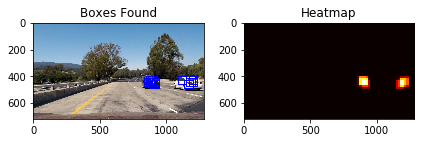

In [14]:
test_scan_multiple_win_sizes(templates_path, test_image, restore_clf_filename=clf_pickle)

## Find Cars in an Image Using Heatmaps
Search multiple sliding windows sizes (according to hyperparameter specification) for images found from the car/notcar classifier, cluster the hits into bounding boxes and label them appropriately.

Test Accuracy of SVC =  0.991
Bounding boxes found:  []


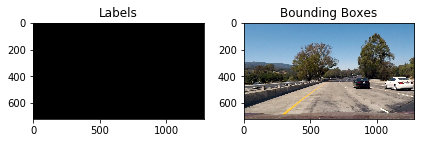

In [15]:
test_find_cars_image(templates_path, test_image, restore_clf_filename=clf_pickle)

## Find Cars in a Video
Search video with sliding windows sizes (according to hyperparameter specification) for images found from the car/notcar classifier, cluster the hits into bounding boxes and label them appropriately.

In [16]:
test_find_cars_video(templates_path, test_video_input, test_video_output, restore_clf_filename=clf_pickle)

Test Accuracy of SVC =  0.991
[MoviePy] >>>> Building video project_video_output.mp4
[MoviePy] Writing audio in project_video_outputTEMP_MPY_wvf_snd.mp3


100%|██████████| 1112/1112 [00:01<00:00, 780.61it/s]

[MoviePy] Done.
[MoviePy] Writing video project_video_output.mp4



100%|█████████▉| 1260/1261 [43:54<00:01,  1.82s/it]


[MoviePy] Done.
[MoviePy] >>>> Video ready: project_video_output.mp4 



In [ ]:
HTML(HTML_VIDEO_SNIPPET.format(test_video_output))

## Find Cars in Video (Debug Mode)
Search video with sliding windows sizes (according to hyperparameter specification) for images found from the car/notcar classifier, cluster the hits into bounding boxes and label them appropriately. Uses debug mode with verbose video output drawing heatmaps and labels into the video.

In [ ]:
test_find_cars_video(templates_path, test_video_input, test_video_output_debug, restore_clf_filename=clf_pickle, debug=True)

Test Accuracy of SVC =  0.991
[MoviePy] >>>> Building video project_video_output_debug.mp4
[MoviePy] Writing audio in project_video_output_debugTEMP_MPY_wvf_snd.mp3


100%|██████████| 1112/1112 [00:01<00:00, 696.78it/s]

[MoviePy] Done.
[MoviePy] Writing video project_video_output_debug.mp4



 58%|█████▊    | 731/1261 [30:07<31:02,  3.51s/it]  

In [ ]:
HTML(HTML_VIDEO_SNIPPET.format(test_video_output_debug))